In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/down_sample.csv')[['Subreddit', 'simp_lem']]

In [4]:
df.head()

,Subreddit,simp_lem
0,0,i hate how i feel when i get interested in som...
1,0,how to make friend can someone suggest somethi...
2,0,so today wa my birthday 9 11 and a i wa hoping...
3,0,having a hard time just need someone to say i ...
4,0,anti depressant inducing trip like state any o...


In [5]:
X = df.drop(columns='Subreddit')
y = df['Subreddit']

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify = y, random_state=42)

In [6]:
cvec = CountVectorizer()
cvec.fit(X_train['simp_lem'])
X_train_cv = pd.DataFrame(cvec.transform(X_train['simp_lem']).toarray(), columns = cvec.get_feature_names())
X_test_cv = pd.DataFrame(cvec.transform(X_test['simp_lem']).toarray(), columns = cvec.get_feature_names())

tvec = TfidfVectorizer()
tvec.fit(X_train['simp_lem'])
X_train_tv = pd.DataFrame(tvec.transform(X_train['simp_lem']).todense(), columns = tvec.get_feature_names())
X_test_tv = pd.DataFrame(tvec.transform(X_test['simp_lem']).todense(), columns = tvec.get_feature_names())

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
rf.score(X_train_cv, y_train)

0.9999555555555556

In [10]:
rf.score(X_test_cv, y_test)

0.7417333333333334

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
cm = confusion_matrix(y_test, rf.predict(X_test_cv))

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)

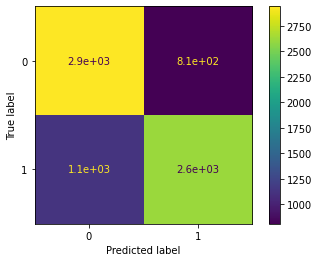

In [16]:
disp.plot();

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train_tv, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rf.score(X_train_tv, y_train)

0.9999555555555556

In [19]:
rf.score(X_test_tv, y_test)

0.7433333333333333

In [20]:
cm = confusion_matrix(y_test, rf.predict(X_test_tv))

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)

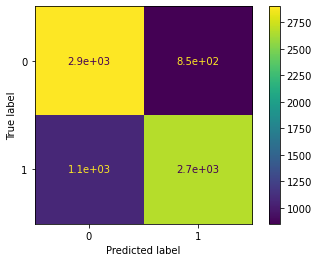

In [22]:
disp.plot();